In [31]:
import matplotlib.pyplot as plt
import numpy as np
from classes import Mapping 
from copy import copy
import pickle
import functions as ft

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [2]:
f0_a = ft.rel_freqs(4.15, 6.85, 612)
f0_b = ft.rel_freqs(6.15, 7.85, 612)
chi = 4
sigma = 1e-3
Q = 50e3
print((ft.yld(Q, chi, sigma, Delta=None, fs=f0_a)+ft.yld(Q, chi, sigma, Delta=None, fs=f0_b))/2)


0.7911648125654406


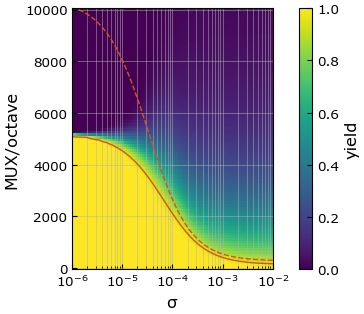

In [3]:
oct = 1
Q = 30e3
chi = 4

nr = 100
Ns = np.linspace(1, 10000, nr)
sigmas = np.logspace(-6, -2, nr)
map = ft.yld_map(Ns, sigmas, Q, chi, oct)
lim1 = oct/np.log2(chi/Q+1)
lim2 = chi/Q/np.sqrt(1+2**(oct/Ns))
lim3 = (2**(oct/Ns)-1)/np.sqrt(1+2**(oct/Ns))
lim4 = oct/np.log2(chi/Q+1)
fig, axes = plt.subplot_mosaic('a', figsize=(18.5/2/2.54, 8/2.54), constrained_layout=True, sharey=True)
ax = axes['a']
# ax.axhline(lim4, c='k', ls='--', label='$2oct/(\mathrm{log}_2(\lambda/Q+1))$')
# ax.plot(lim2, Ns, c='k', ls='--', label='$\lambda/Q$')
# ax.plot(lim3, Ns, c='k', ls='--', label='$2^(oct/N)-1$')
# ax.imshow(map)
c = ax.pcolormesh(sigmas, Ns, map, shading='auto', cmap='viridis')
c.set_clim(0, 1)
fig.colorbar(c, ax=ax, label='yield', orientation='vertical', location='right')
ax.set_yscale('linear')
ax.set_xscale('log')
ax.set_ylabel('MUX/octave')
ax.set_xlabel('$\sigma$')
# ax.set_ylim(0, 6000)
ax.set_xlim(1e-6, 1e-2)
CS = ax.contour(sigmas, Ns, map, levels=[0.95], colors='o')
# ax = axes['b']	
oct = 1
Q = 30e3

# nr = 100
chis = [2]
# Ns = np.linspace(1, 10000, nr)
# sigmas = np.logspace(-6, -2, nr)

for chi in chis:
    map = ft.yld_map(Ns, sigmas, Q, chi, oct)
    CS = ax.contour(sigmas, Ns, map, levels=[0.95], colors='o', linestyles='--')
ax.set_xscale('log')

In [32]:
## Load chips and initiate objects

LT295chip3 = Mapping('LT295chip3_master.pkl', Q=Q, min_lw_spacing=chi)
LT343chip5 = Mapping('LT343chip5_master.pkl')
LT343chip9 = Mapping('LT343chip9_master.pkl')
LT361chip4 = Mapping('LT361chip4_master.pkl', mask_edges=True)
LT361chip4_trim = Mapping('LT361chip4_master.pkl', mask_edges=True, trim=True)
LT361chip5 = Mapping('LT361chip4_master.pkl')
LT361chip7 = Mapping('LT361chip7_master.pkl')
LT361chip8 = Mapping('LT361chip4_master.pkl')
LT402chip1 = Mapping('LT402chip1_master.pkl', mask_edges=True, Q=Q, min_lw_spacing=chi)
LT402chip4 = Mapping('LT402chip4_master.pkl', mask_edges=False, Q=Q, min_lw_spacing=chi)
LT402chip5 = Mapping('LT402chip5_master.pkl', mask_edges=True)
LT402chip6 = Mapping('LT402chip6_master.pkl', mask_edges=True, Q=Q, min_lw_spacing=chi)
LT402chip6_trim = Mapping('LT402chip6_master.pkl', trim=True, Q=Q, min_lw_spacing=chi)


In [ ]:
chip = LT402chip4
# chip = LT402chip1
chip.remove_spatial()
fig, axes = plt.subplot_mosaic('abc', figsize=(18.5/2.54, 9/2.54), constrained_layout=True)
ax = axes['a']
ax.set_title('raw', fontsize=12)
clim = [-0.1, 0.1]
img = ax.imshow(chip.df_f[chip.map], cmap='viridis', origin='lower', clim=clim)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('df/f')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax = axes['b']
ax.set_title('freq. correction', fontsize=12)
clim = [-0.02, 0.02]
img = ax.imshow(chip.df_f_fit[chip.map], cmap='viridis', origin='lower', clim=clim)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('df/f')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax = axes['c']
ax.set_title('spatial & \nfreq. corrections', fontsize=12)
clim = [-0.02, 0.02]
ax.imshow(chip.df_f_spatial[chip.map], cmap='viridis', origin='lower', clim=clim)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('df/f')
ax.set_xticklabels([])
ax.set_yticklabels([])

In [ ]:
file = 'LT361chip4_master.pkl'
with open(file, 'rb') as f:
    arr = pickle.load(f)
trims = arr['trimdesign']['fingers'] - arr['design']['fingers']
control_ids = trims == 0
trimmed_ids = trims < -0.08

Text(0, 0.5, 'Counts')

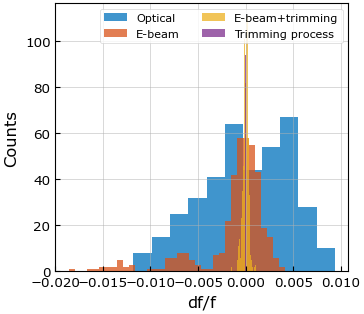

In [54]:
chips = [LT295chip3, LT361chip4, LT402chip6_trim]
labels = ['Optical', 'E-beam', 'E-beam+trimming', 'Trimming process']
fig, axes = plt.subplot_mosaic('a', figsize=(18.5/2/2.54, 8/2.54), constrained_layout=True)
ax = axes['a']
for chip in chips:
    ax.hist(chip.df_f_fit, alpha=0.75, bins='auto')
LT361chip4_trim = Mapping('LT361chip4_master.pkl', mask_edges=True, trim=True)
LT361chip4_trim.remap(~control_ids)
ax.hist(LT361chip4_trim.df_f_fit, bins=1, alpha=0.75)
ax.legend(labels, ncols=2, loc='best')
ax.set_xlabel('df/f')
ax.set_ylabel('Counts')
# ax.set_xscale('log')
# ax.set_xlim(left=-8, right=8)  # Set limits for both positive and negative sides


Text(0, 0.5, 'Counts')

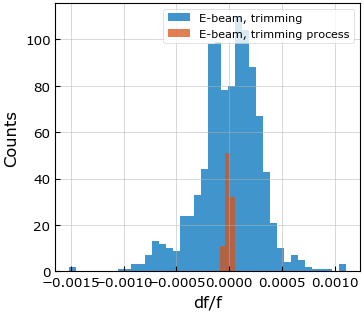

In [49]:
chips = [LT402chip6_trim]
labels = ['E-beam, trimming', 'E-beam, trimming process']
fig, axes = plt.subplot_mosaic('a', figsize=(18.5/2/2.54, 8/2.54), constrained_layout=True)
ax = axes['a']
for chip in chips:
    ax.hist(chip.df_f_fit, alpha=0.75, bins=40)
LT361chip4_trim = Mapping('LT361chip4_master.pkl', mask_edges=True, trim=True)
LT361chip4_trim.remap(~control_ids)
ax.hist(LT361chip4_trim.df_f_fit, bins=3, alpha=0.75)
ax.legend(labels, ncols=1)
ax.set_xlabel('df/f')
ax.set_ylabel('Counts')
# ax.set_xscale('log')
# ax.set_xlim(left=-8, right=8)  # Set limits for both positive and negative sides

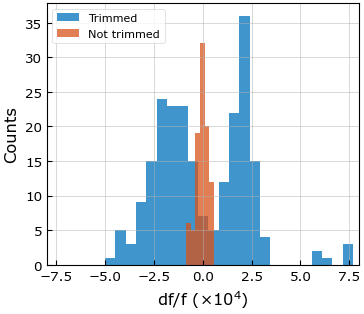

In [29]:
fig, axs = plt.subplot_mosaic('a', figsize=(18.5/2/2.54, 8/2.54), constrained_layout=True)
ax = axs['a']
LT361chip4_trim = Mapping('LT361chip4_master.pkl', mask_edges=True, trim=True)
LT361chip4_trim.remap(~trimmed_ids)
ax.hist(LT361chip4_trim.df_f_fit*1e4, bins=24, alpha=0.75, label='Trimmed')
LT361chip4_trim = Mapping('LT361chip4_master.pkl', mask_edges=True, trim=True)
LT361chip4_trim.remap(~control_ids)
ax.hist(LT361chip4_trim.df_f_fit*1e4, bins=6, alpha=0.75, label='Not trimmed')
ax.set_xlim(-8, 8)
ax.set_xlabel('df/f ($\\times$10$^{4}$)')
ax.set_ylabel('Counts')
ax.legend()

In [ ]:
chips = [LT402chip4, LT402chip1, LT361chip7]
labels = ['E-beam 32x32 150um pp', 'E-beam 20x20 150um pp', 'E-beam 11x11 450um pp']
fig, axes = plt.subplot_mosaic('ad;cb', figsize=(18.5/3*2/2.54, 12/2.54), constrained_layout=True)
spatial = [1, 1, 0]
ax = axes['b']
for i, chip in enumerate(chips):
    if spatial[i]:
        chip.remove_spatial()
        ax.hist(chip.df_f_spatial, alpha=0.75, bins='auto')
        print(np.nanstd(chip.df_f_spatial[chip.edge_mask]))
    else:
        ax.hist(chip.df_f_fit, alpha=0.75, bins='auto')
        print(np.nanstd(chip.df_f_fit))
ax.legend(labels)
ax.set_xlabel('df/f')
ax.set_ylabel('Counts')
ax.set_xlim(-0.025, 0.025)
ax = axes['a']
ax.imshow(chips[0].df_f_spatial[chips[0].map], cmap='viridis', origin='lower', clim=[-0.02, 0.02])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(labels[0], fontsize=12)
ax = axes['c']
empty_array = np.full((32, 32), np.nan)  # Create a 32x32 array filled with NaNs
center_x, center_y = (empty_array.shape[0] // 2, empty_array.shape[1] // 2)
half_size = chips[1].df_f_spatial[chips[1].map].shape[0] // 2

# Place df_f_spatial[chips[1].map] in the center
empty_array[center_x - half_size:center_x + half_size, center_y - half_size:center_y + half_size] = chips[1].df_f_spatial[chips[1].map]
ax.imshow(empty_array, cmap='viridis', origin='lower', clim=[-0.02, 0.02])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(labels[1], fontsize=12)
ax = axes['d']
ax.imshow(chips[2].df_f_fit[chips[2].map], cmap='viridis', origin='lower', clim=[-0.02, 0.02])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(labels[2], fontsize=12)
